<a href="https://colab.research.google.com/github/kazarach/UAS_ML/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [3]:
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [4]:
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [5]:
num_epochs = 100
for epoch in range(num_epochs):

    y_predicted = model(X)
    loss = criterion(y_predicted, y)

    loss.backward()
    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4107.6494
epoch: 20, loss = 2893.8313
epoch: 30, loss = 2066.3223
epoch: 40, loss = 1502.0557
epoch: 50, loss = 1117.2104
epoch: 60, loss = 854.6824
epoch: 70, loss = 675.5591
epoch: 80, loss = 553.3194
epoch: 90, loss = 469.8830
epoch: 100, loss = 412.9217


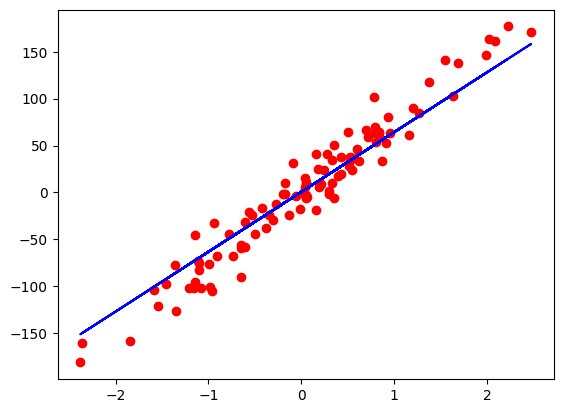

In [6]:
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()